## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

D:\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
D:\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np

## Import Datasets

In [2]:
test_data = pd.read_csv('test.csv')

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
df_test = pd.DataFrame(test_data)

In [5]:
df_train = pd.DataFrame(train_data)

In [6]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### battery_power: Total energy a battery can store in one time measured in mAh
### blue: Has bluetooth or not
### clock_speed: speed at which microprocessor executes instructions
### dual_sim: Has dual sim support or not
### fc: Front Camera mega pixels
### four_g: Has 4G or not
### int_memory: Internal Memory in Gigabytes
### m_dep: Mobile Depth in cm
### mobile_wt: Weight of mobile phone
### n_cores: Number of cores of processor
### pc: Primary Camera mega pixels
### px_height: Pixel Resolution Height
### px_width: Pixel Resolution Width
### ram: Random Access Memory in Mega Bytes
### sc_h: Screen Height of mobile in cm
### sc_w: Screen Width of mobile in cm
### talk_time: longest time that a single battery charge will last when you are
### three_g: Has 3G or not
### touch_screen: Has touch screen or not
### wifi: Has wifi or not
### price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

### --------------------------------------------------------------------------------------------------------------------------

# PreProcessing

## Comparison between the range of changes of each feature of the dataset, to ensure that the range of changes of each feature of the dataset is the same:

In [7]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


## Checked Missing values

In [9]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0, 0.5, 'price_range')

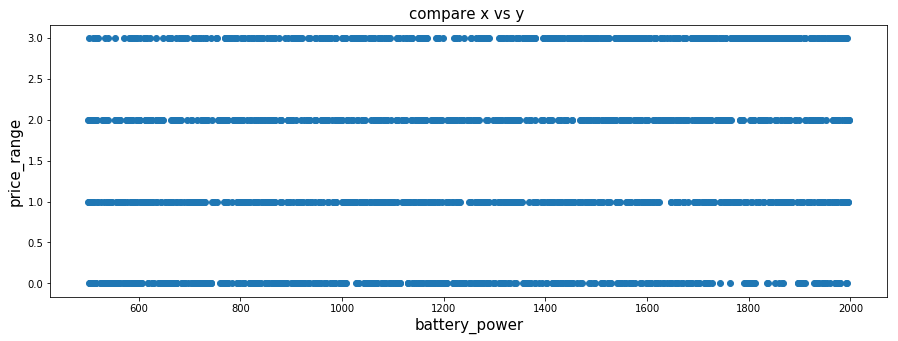

In [11]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['battery_power'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('battery_power', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

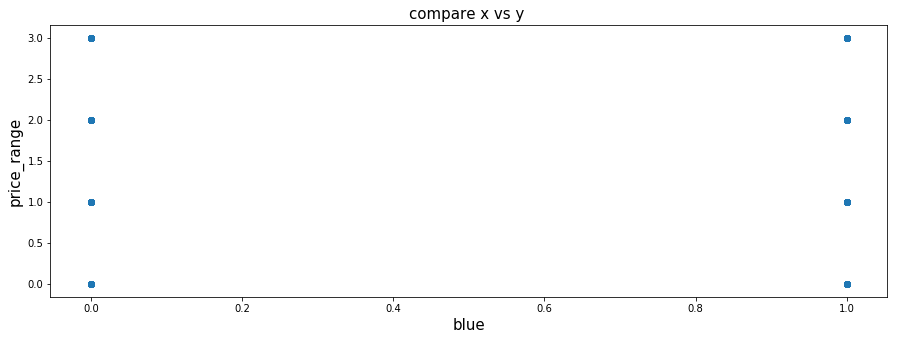

In [12]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['blue'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('blue', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

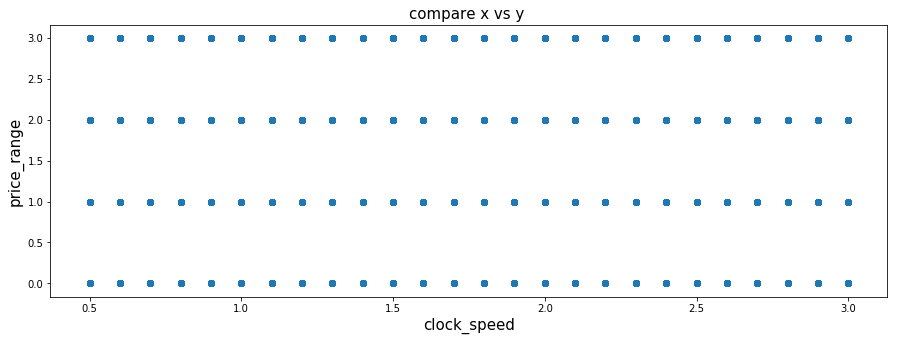

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['clock_speed'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('clock_speed', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

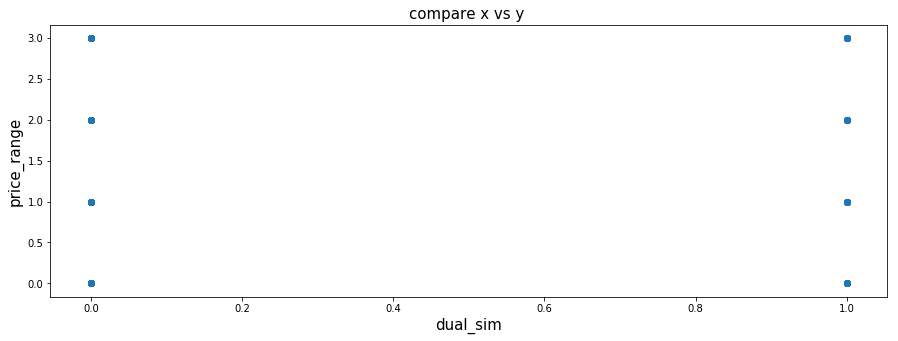

In [14]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['dual_sim'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('dual_sim', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

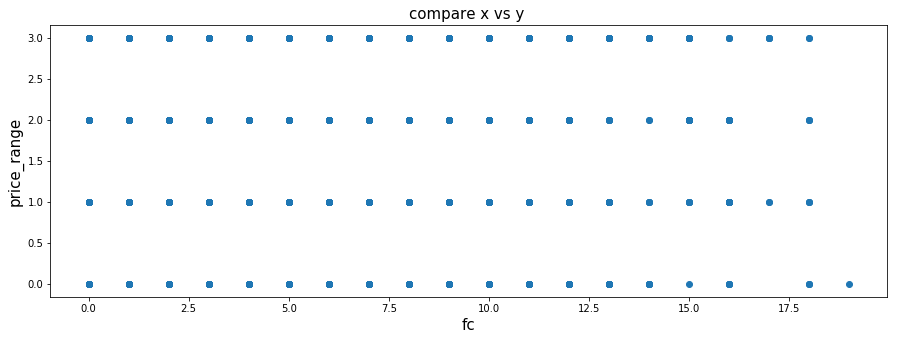

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['fc'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('fc', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

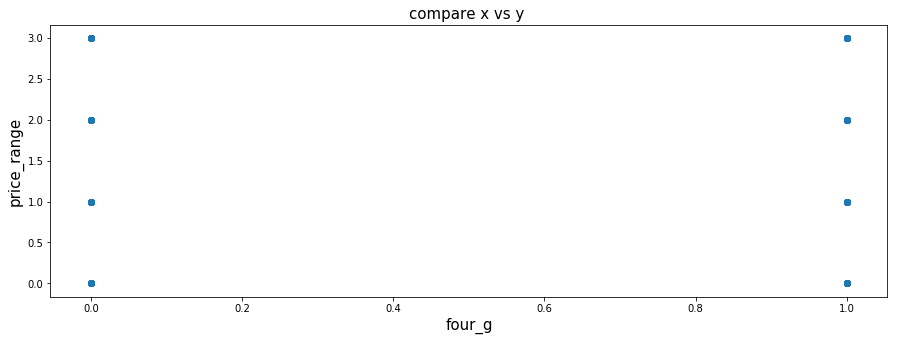

In [16]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['four_g'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('four_g', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

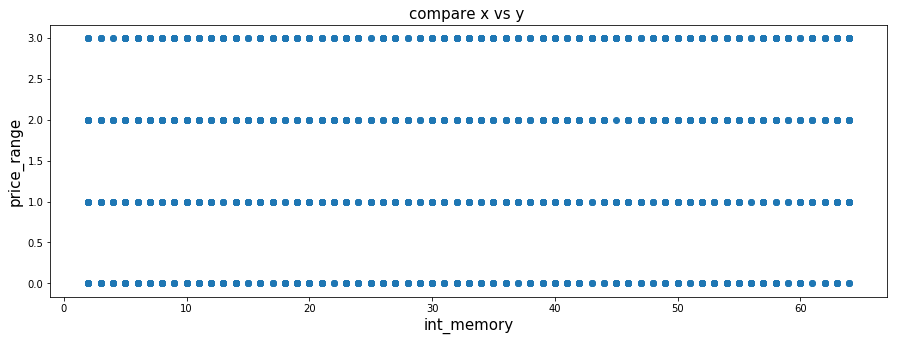

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['int_memory'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('int_memory', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

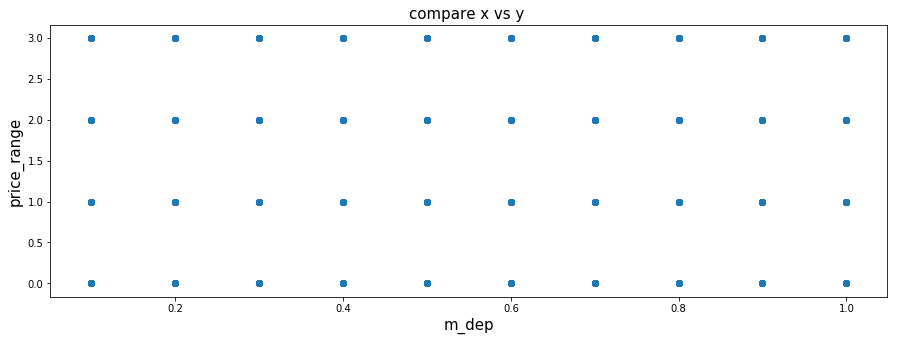

In [18]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['m_dep'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('m_dep', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

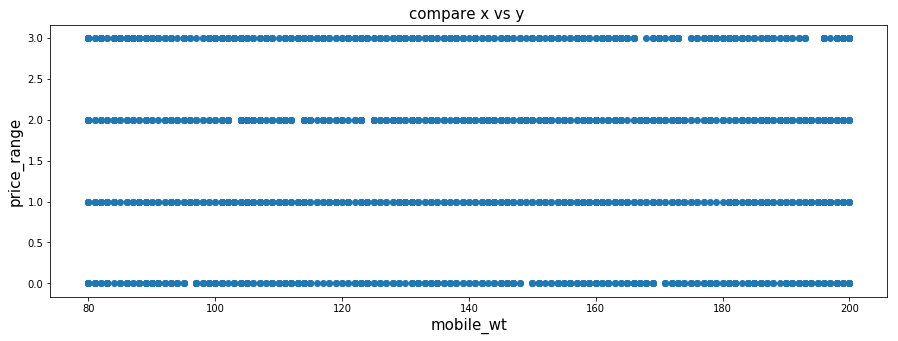

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['mobile_wt'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('mobile_wt', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

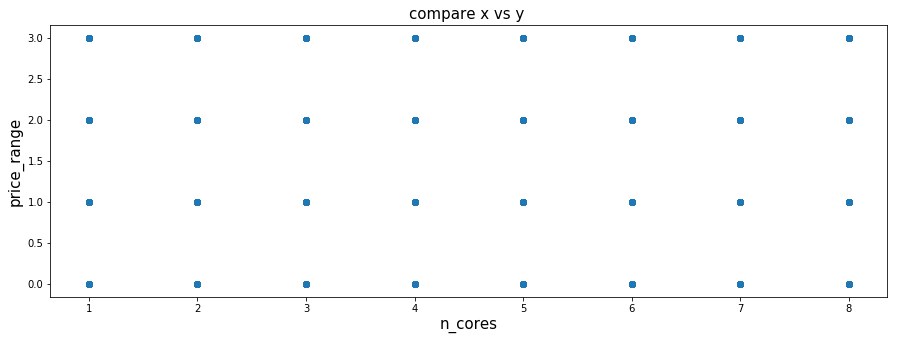

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['n_cores'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('n_cores', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

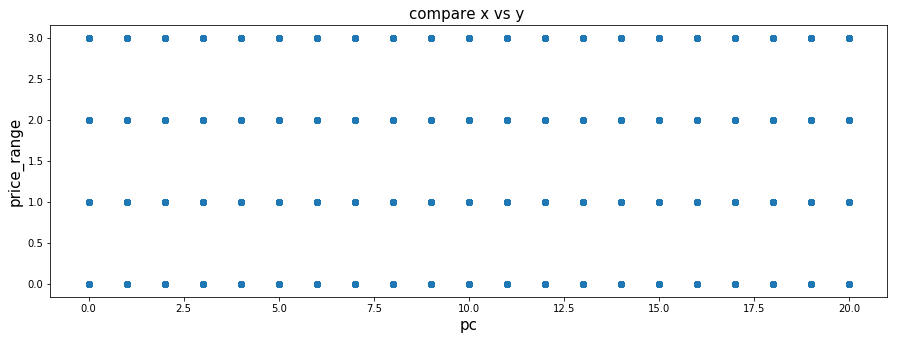

In [21]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['pc'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('pc', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

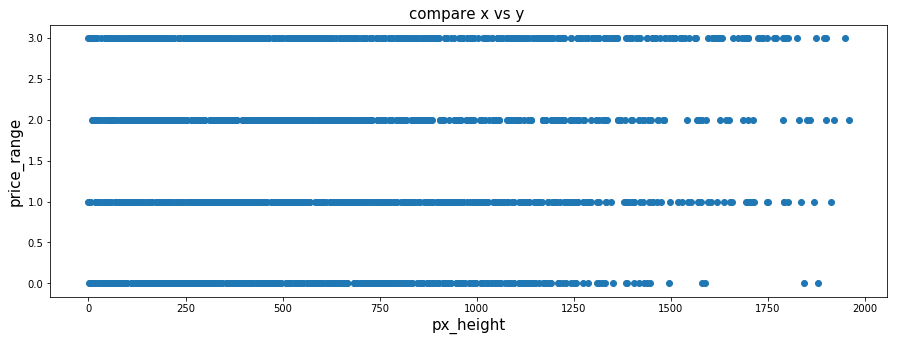

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['px_height'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('px_height', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

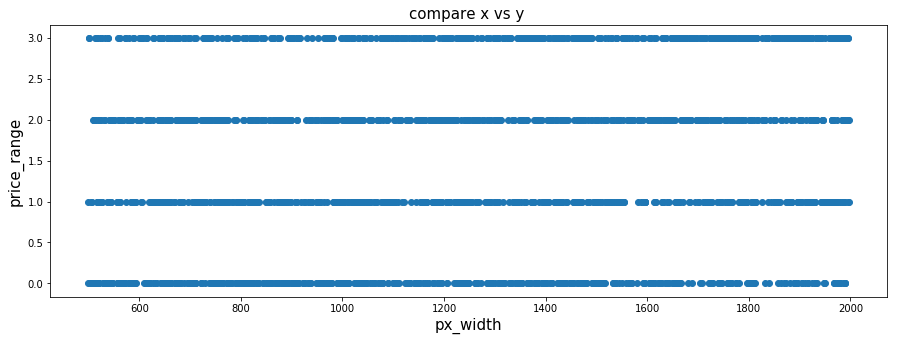

In [23]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['px_width'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('px_width', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

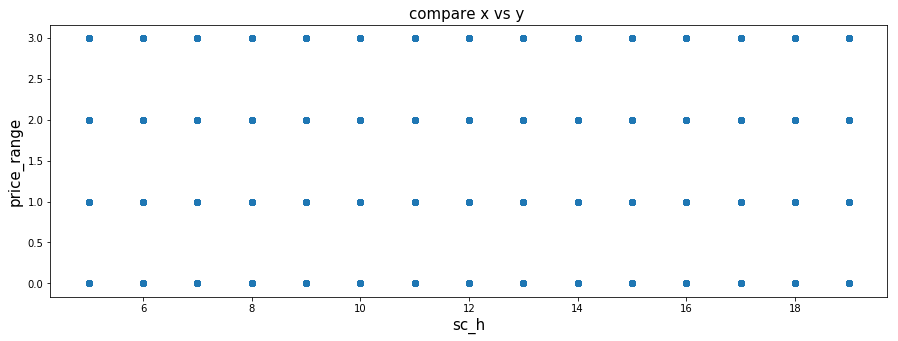

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['sc_h'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('sc_h', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

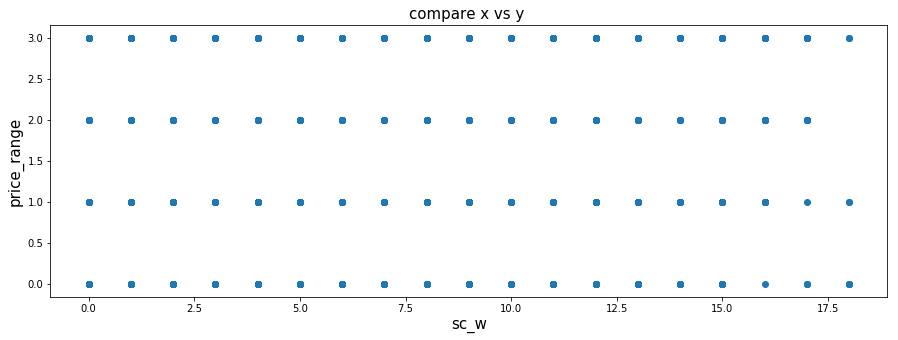

In [25]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['sc_w'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('sc_w', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

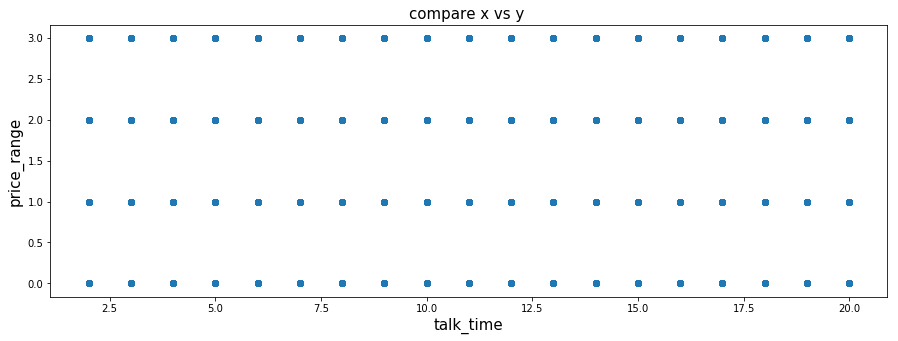

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['talk_time'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('talk_time', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

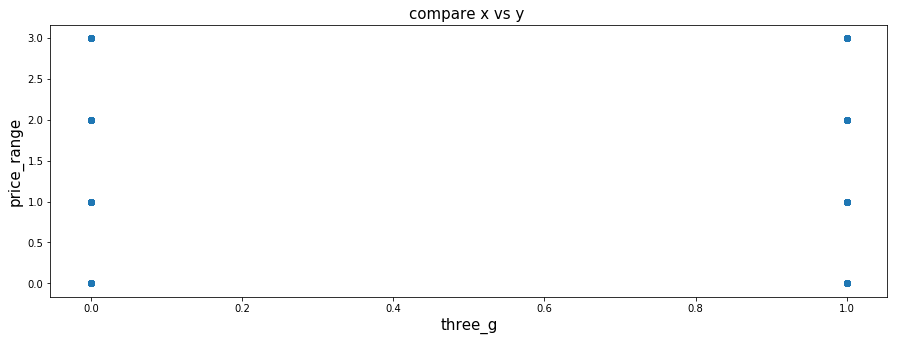

In [27]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['three_g'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('three_g', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

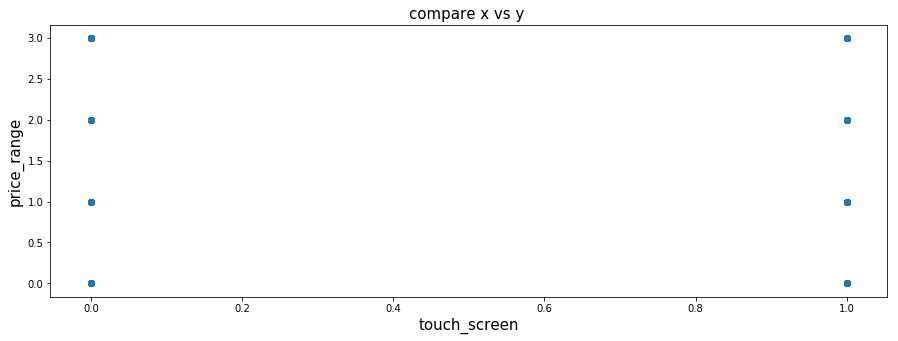

In [28]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['touch_screen'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('touch_screen', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

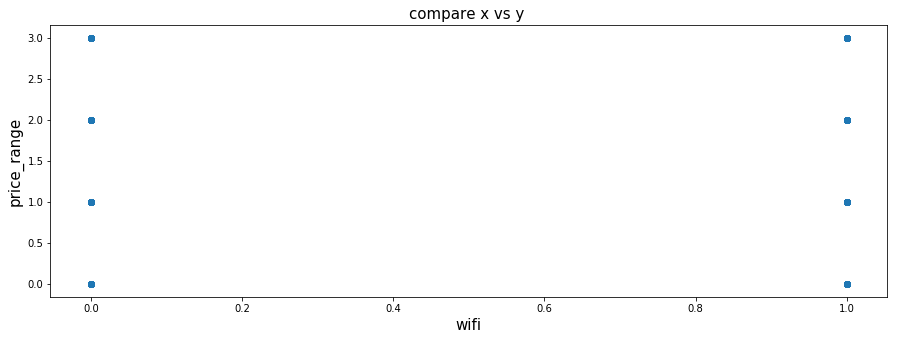

In [29]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['wifi'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('wifi', fontsize=15)
plt.ylabel('price_range', fontsize=15)

Text(0, 0.5, 'price_range')

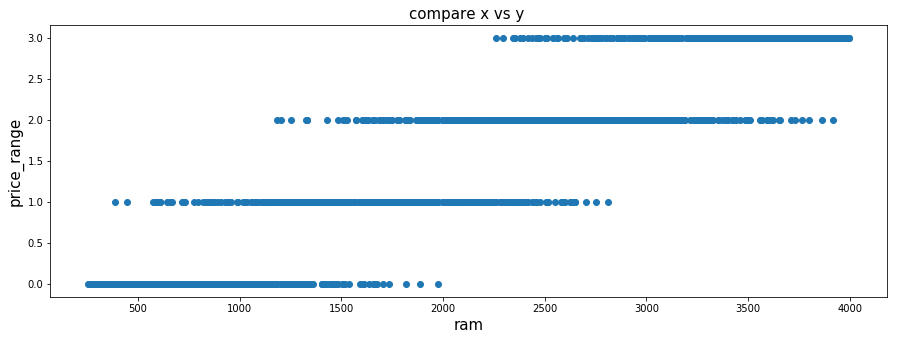

In [30]:
plt.figure(figsize=(15,5))
plt.scatter(df_train['ram'],df_train['price_range'], data=df_train)
plt.title('compare x vs y ', fontsize=15)
plt.xlabel('ram', fontsize=15)
plt.ylabel('price_range', fontsize=15)

## Only in the chart we were able to understand that the ram would increase the price range.

## The other charts didn't give us specific information.

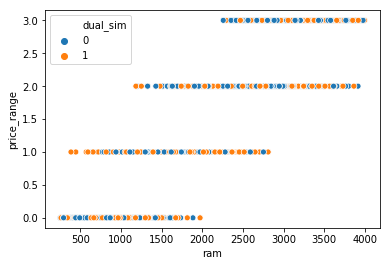

In [31]:
sns.scatterplot(x='ram', y='price_range',hue='dual_sim', data=df_train)

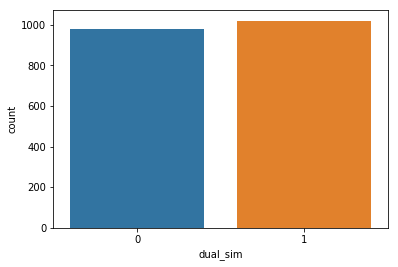

In [32]:
sns.countplot(x='dual_sim', data=df_train)

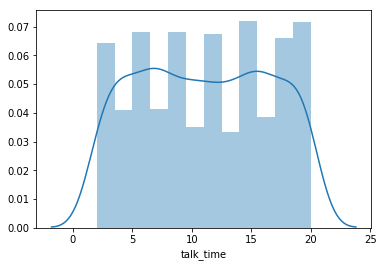

In [33]:
x = df_train['talk_time']
sns.distplot(x)

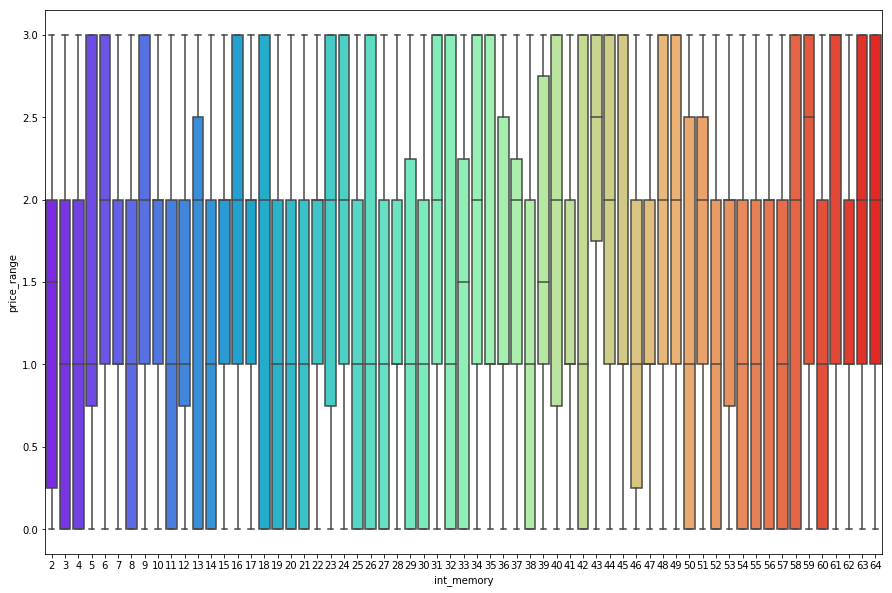

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(x='int_memory' , y='price_range', data=df_train , palette='rainbow')

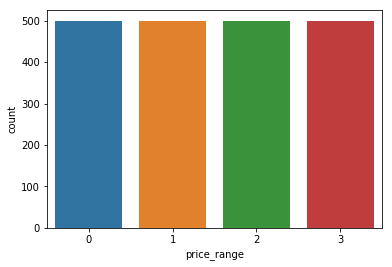

In [35]:
sns.countplot(x='price_range', data=df_train)

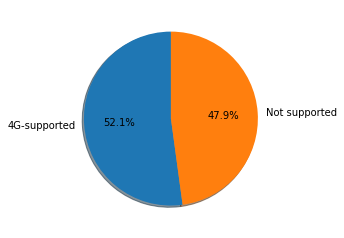

In [36]:
labels = ['4G-supported','Not supported']
values = df_train['four_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values , labels=labels , autopct='%1.1f%%' , shadow=True , startangle=90)
plt.show()

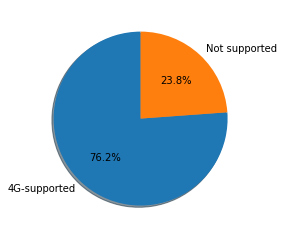

In [37]:
labels = ['4G-supported','Not supported']
values = df_train['three_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values , labels=labels , autopct='%1.1f%%' , shadow=True , startangle=90)
plt.show()

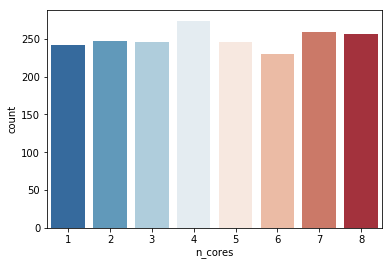

In [38]:
sns.countplot(x='n_cores', data=df_train , palette='RdBu_r')

In [39]:
df = df_train[df_train['fc'] > 0]
df.reset_index(inplace=True)
df.drop('index',axis=1 ,inplace=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
2,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
3,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
4,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1522,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1523,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1524,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [40]:
df2 = df_test[df_test['fc'] > 0]
df2.reset_index(inplace=True)
df2.drop('index',axis=1 ,inplace=True)
df2

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,991,1807,0,1.2,0,4,0,37,0.8,162,...,11,246,932,2741,7,1,9,1,1,1
786,992,1797,1,2.6,0,4,0,42,0.6,174,...,20,57,1169,3359,16,6,18,1,1,1
787,994,567,1,2.7,1,14,1,56,0.4,165,...,17,555,1290,336,7,6,7,1,1,1
788,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0


In [41]:
df2.drop('id', axis=1, inplace=True)
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,1807,0,1.2,0,4,0,37,0.8,162,1,11,246,932,2741,7,1,9,1,1,1
786,1797,1,2.6,0,4,0,42,0.6,174,3,20,57,1169,3359,16,6,18,1,1,1
787,567,1,2.7,1,14,1,56,0.4,165,8,17,555,1290,336,7,6,7,1,1,1
788,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0


## Checked Missing Value in Test data

In [42]:
df2.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

# Models

## DTs

In [43]:
x = df.drop('price_range' , axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

In [44]:
DT = DecisionTreeClassifier()

In [45]:
DT.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
DT_pred = DT.predict(x_test)

In [47]:
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       163
           1       0.71      0.74      0.72       124
           2       0.74      0.72      0.73       156
           3       0.87      0.89      0.88       168

   micro avg       0.82      0.82      0.82       611
   macro avg       0.81      0.81      0.81       611
weighted avg       0.82      0.82      0.82       611



In [48]:
print('Accuracy:',metrics.accuracy_score (y_test ,DT_pred))

Accuracy: 0.8183306055646481


## RF

In [49]:
x = df.drop('price_range' , axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [50]:
RF = RandomForestClassifier(n_estimators=100)

In [51]:
RF.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
RF_pred = RF.predict(x_test)

In [53]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        86
           1       0.75      0.73      0.74        67
           2       0.72      0.82      0.77        76
           3       0.94      0.86      0.90        77

   micro avg       0.84      0.84      0.84       306
   macro avg       0.84      0.83      0.84       306
weighted avg       0.85      0.84      0.84       306



In [54]:
print('Accuracy:',metrics.accuracy_score (y_test ,RF_pred))

Accuracy: 0.8398692810457516


## SVM

In [55]:
x = df.drop('price_range' , axis=1)
y = df['price_range']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [56]:
paramgrid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf','linear','poly','sigmoid']}

In [57]:
SVM = SVC()

In [58]:
grid = GridSearchCV(estimator=SVM, param_grid = paramgrid ,refit=True , verbose=3)

In [59]:
grid.fit(x_train , y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.257985257985258, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.257985257985258, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.25862068965517243, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9656019656019657, total=   0.4s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9754299754299754, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.958128078817734, total=   0.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9631449631449631, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9680589680589681, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9433497536945813, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ........

[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=0.1, gamma=0.0001, kernel=sigmoid, score=0.25862068965517243, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.257985257985258, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.257985257985258, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.25862068965517243, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9606879606879607, total=   2.3s
[CV] C=1, gamma=1, kernel=linear ...

[CV]  C=1, gamma=0.0001, kernel=linear, score=0.9605911330049262, total=   1.3s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.9631449631449631, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.9680589680589681, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV]  C=1, gamma=0.0001, kernel=poly, score=0.9433497536945813, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV]  C=1, gamma=0.0001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV]  C=1, gamma=0.0001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV]  C=1, gamma=0.0001, kernel=sigmoid, score=0.25862068965517243, total=   0.0s
[CV] C=10, gamma=1

[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.5356265356265356, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.4852216748768473, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=0.9606879606879607, total=   2.4s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=0.9754299754299754, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=0.9605911330049262, total=   1.3s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV]  C=10, gamma=0.0001, kernel=poly, score=0.9631449631449631, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=poly .................................
[CV]  C=10, gamma=0.0001, kernel=poly, score=0.9680589680589681, total=   0.0s
[CV] C=10, gamma=

[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.25862068965517243, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.4914004914004914, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.5356265356265356, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.4852216748768473, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.9606879606879607, total=   2.3s
[CV] C=100

[CV]  C=1000, gamma=0.001, kernel=linear, score=0.9754299754299754, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV]  C=1000, gamma=0.001, kernel=linear, score=0.9605911330049262, total=   1.3s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.9631449631449631, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.9680589680589681, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.9433497536945813, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV]  C=1000, gamma=0.001, kernel=sigmoid, score=0.257985257985258, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [60]:
grid_pred = grid.predict(x_test)

In [61]:
print(classification_report(y_test , grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        86
           1       0.94      0.97      0.96        67
           2       0.97      0.96      0.97        76
           3       0.97      1.00      0.99        77

   micro avg       0.97      0.97      0.97       306
   macro avg       0.97      0.97      0.97       306
weighted avg       0.97      0.97      0.97       306



In [62]:
print('Accuracy:',metrics.accuracy_score (y_test ,grid_pred))

Accuracy: 0.9738562091503268


In [63]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

## predict Test data 

In [64]:
last_test = grid.predict(df2)

In [65]:
last_test

array([3, 3, 2, 3, 1, 3, 3, 3, 0, 3, 3, 0, 2, 0, 2, 1, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 2, 0, 3, 0, 1, 3, 1, 2, 1, 2, 0, 0, 1, 0, 3, 1, 2, 1,
       0, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1, 2, 3, 1, 2, 1, 2, 2, 3,
       3, 0, 2, 2, 0, 3, 0, 3, 0, 3, 1, 3, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0,
       3, 2, 0, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 2, 1, 2, 3, 2, 2,
       1, 1, 0, 3, 2, 1, 2, 1, 2, 3, 3, 3, 3, 0, 3, 3, 3, 2, 2, 3, 3, 3,
       3, 1, 0, 3, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1,
       0, 3, 1, 0, 2, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0,
       3, 2, 3, 3, 0, 1, 0, 0, 1, 0, 2, 3, 0, 3, 0, 3, 1, 2, 0, 0, 2, 1,
       3, 3, 1, 0, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 3, 2, 1, 3, 1, 2,
       0, 0, 3, 2, 3, 3, 2, 1, 3, 2, 3, 1, 1, 2, 3, 1, 0, 3, 3, 0, 1, 2,
       0, 2, 3, 1, 3, 2, 1, 0, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 2, 3, 1, 3,
       2, 2, 2, 3, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 1, 0, 3, 1, 3, 2, 0, 0,
       0, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 3, 2, 0,

In [66]:
df2['price_range'] = last_test

In [67]:
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,1807,0,1.2,0,4,0,37,0.8,162,1,...,246,932,2741,7,1,9,1,1,1,2
786,1797,1,2.6,0,4,0,42,0.6,174,3,...,57,1169,3359,16,6,18,1,1,1,3
787,567,1,2.7,1,14,1,56,0.4,165,8,...,555,1290,336,7,6,7,1,1,1,0
788,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0


## So we conclude that the SVM algorithm has the best results.